In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'

In [17]:
df = pd.read_csv(url)

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='sepal_length'>

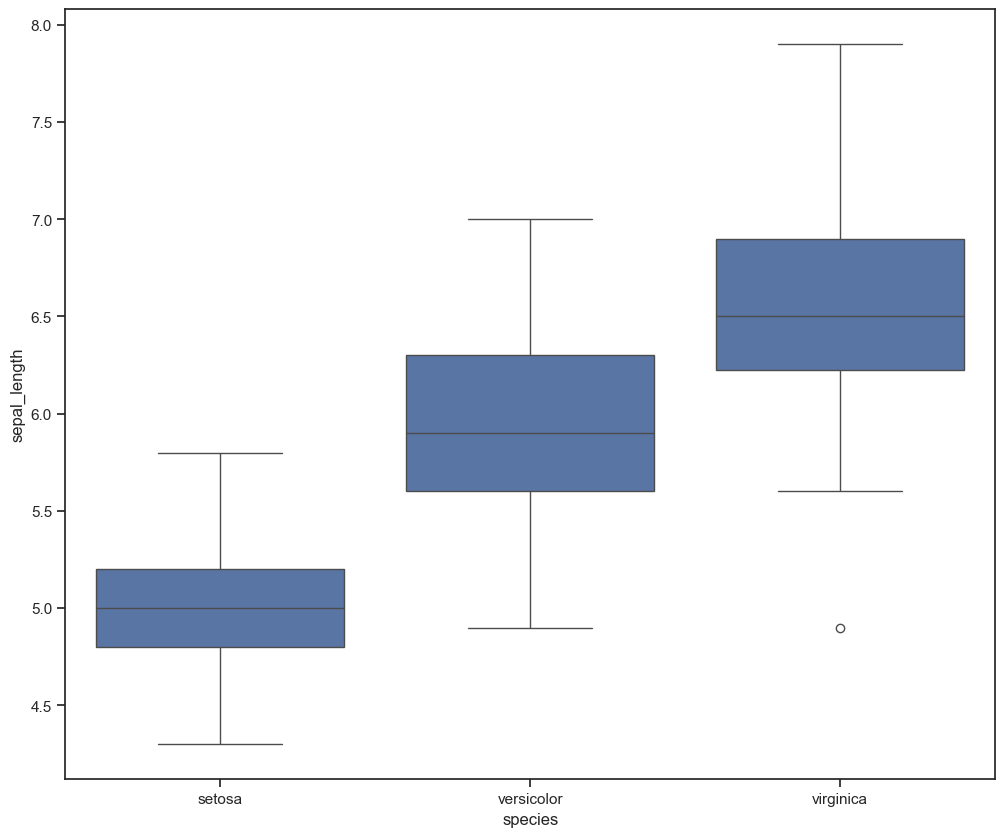

In [21]:
sns.set(style='ticks')
plt.figure(figsize=(12,10))
sns.boxplot(x='species', y='sepal_length', data=df)

In [22]:
X = df.drop(['species'], axis=1)
y = df['species']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_val)

array([[-1.49578469e+00,  2.34849997e-01, -1.30799921e+00,
        -1.29153930e+00],
       [ 3.30818053e-01, -6.66973990e-01,  5.57206722e-01,
         2.15615910e-03],
       [ 6.96138601e-01, -4.41517994e-01,  3.31121154e-01,
         1.31525705e-01],
       [ 1.67032673e+00, -2.16061997e-01,  1.17894203e+00,
         5.19634344e-01],
       [-3.45024963e-02, -8.92429987e-01,  2.18078370e-01,
        -2.56582933e-01],
       [-3.99823045e-01, -1.34334198e+00,  1.61556979e-01,
         1.31525705e-01],
       [ 1.18323267e+00,  2.34849997e-01,  1.23546343e+00,
         1.42522117e+00],
       [-8.86917110e-01,  1.36212998e+00, -1.25147782e+00,
        -1.03280021e+00],
       [ 1.06145915e+00, -1.34334198e+00,  1.17894203e+00,
         7.78373436e-01],
       [-1.25223766e+00, -2.16061997e-01, -1.30799921e+00,
        -1.42090885e+00],
       [ 8.17912118e-01, -2.16061997e-01,  8.39813682e-01,
         1.03711253e+00],
       [ 1.18323267e+00, -6.66973990e-01,  6.13728114e-01,
      

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [26]:
y_pred = classifier.predict(X_val)  # Predicting the test set results

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_val, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_val,y_pred)
print("Accuracy:",result2)



Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [28]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

f1_list = []
k_list = []
for k in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='micro')
    f1_list.append(f1)
    k_list.append(k)
    

In [29]:
f1_list

[0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0]

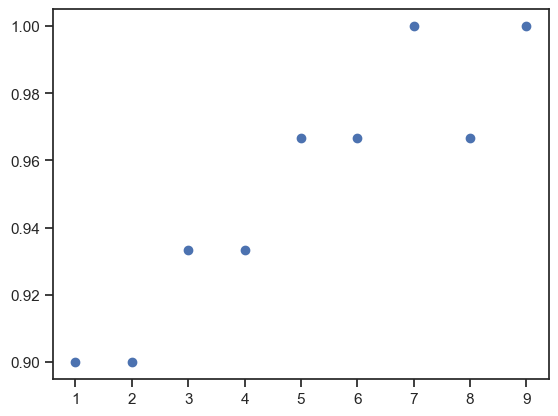

In [32]:
plt.scatter(k_list, f1_list)

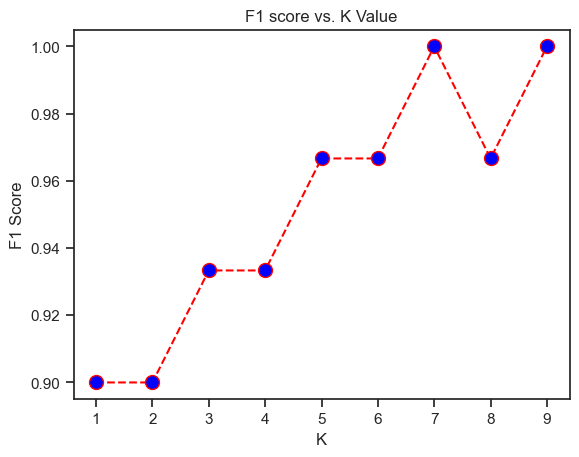

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(k_list, f1_list, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.show()